Milestone 1: Data Collection

Requirements:

● Scrape movie data from websites like IMDb, or use a public API like TMDb API or OMDb API.

● The dataset should include the following attributes:

○ Movie title

○ Genre(s)

○ Release year

○ IMDb rating

○ Number of user votes

○ Movie description

○ Poster URL (optional, for visualization)

In [ ]:
!pip install requests
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import time


In [6]:
import requests
from bs4 import BeautifulSoup
import csv
import time

# User-Agent to mimic a browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

def scrape_page(page_url):
    try:
        response = requests.get(page_url, headers=headers, timeout=10)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            movie_items = soup.find_all("div", class_="item item--short grid-item")

            for item in movie_items:
                movie_data = {
                    'title': None,
                    'release_year': None,
                    'country': None,
                    'genres': None,
                    'duration': None,
                    'premiere_date': None,
                    'imdb_rating': None,
                    'kp_rating': None,
                    'votes': None,
                    'description': None,
                    'poster_url': None
                }

                # Extract Title
                title_tag = item.find("a", class_="item__title")
                if title_tag:
                    movie_data['title'] = title_tag.get_text(strip=True)

                # Extract Poster URL
                poster_tag = item.find("a", class_="item__img img-fixed-size")
                if poster_tag:
                    img_tag = poster_tag.find("img")
                    if img_tag and 'src' in img_tag.attrs:
                        movie_data['poster_url'] = "https://kinogo.net" + img_tag['src']

                # Extract Description
                desc = item.find("div", class_="item__desc")
                if desc:
                    items = desc.find("ul", class_="item__list")
                    if items:
                        for list_item in items.find_all("li"):
                            text = list_item.get_text(strip=True)

                            if "Год выпуска:" in text:
                                movie_data['release_year'] = text.replace("Год выпуска:", "").strip()

                            elif "Страна:" in text:
                                movie_data['country'] = text.replace("Страна:", "").strip()

                            elif "Жанр:" in text:
                                movie_data['genres'] = text.replace("Жанр:", "").strip()

                            elif "Продолжительность:" in text:
                                movie_data['duration'] = text.replace("Продолжительность:", "").strip()

                            elif "Премьера (в мире):" in text:
                                movie_data['premiere_date'] = text.replace("Премьера (в мире):", "").strip()

                    description_tag = desc.find("div", class_="item__text")
                    if description_tag:
                        movie_data['description'] = description_tag.get_text(strip=True)

                # Extract Ratings
                rating_div = item.find("div", class_="item__rates")
                if rating_div:
                    imdb_rating_tag = rating_div.find("div", class_="item__rates-imdb")
                    kp_rating_tag = rating_div.find("div", class_="item__rates-kp")

                    imdb_rating = imdb_rating_tag.get_text(strip=True) if imdb_rating_tag else None
                    kp_rating = kp_rating_tag.get_text(strip=True) if kp_rating_tag else None

                    movie_data['imdb_rating'] = imdb_rating if imdb_rating else kp_rating
                    movie_data['kp_rating'] = kp_rating if kp_rating else imdb_rating

                # Extract Votes
                rating_votes_div = item.find("div", class_="item__rating-votes")
                if rating_votes_div:
                    rating_votes_text = rating_votes_div.get_text(strip=True)
                    rating_parts = rating_votes_text.split("(")

                    if len(rating_parts) > 1:
                        movie_data['votes'] = rating_parts[1].replace("гол.)", "").strip()

                # Add collected movie data
                all_movie_data.append(movie_data)

        else:
            print(f"Failed to retrieve page {page_url}. Status code: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"Error while retrieving page {page_url}: {e}")

all_movie_data = []
base_url = "https://kinogo.net/filmy/page/{}/"
start_page = 1
end_page = 160

for page in range(start_page, end_page + 1):
    page_url = base_url.format(page)
    print(f"Scraping page: {page_url}")
    scrape_page(page_url)
    time.sleep(1)

# Save to CSV
with open('movies_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['title', 'release_year', 'country', 'genres', 'duration', 'premiere_date', 'imdb_rating', 'kp_rating', 'votes', 'description', 'poster_url']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerows(all_movie_data)


Scraping page: https://kinogo.net/filmy/page/1/
Scraping page: https://kinogo.net/filmy/page/2/
Scraping page: https://kinogo.net/filmy/page/3/
Scraping page: https://kinogo.net/filmy/page/4/
Scraping page: https://kinogo.net/filmy/page/5/
Scraping page: https://kinogo.net/filmy/page/6/
Scraping page: https://kinogo.net/filmy/page/7/
Scraping page: https://kinogo.net/filmy/page/8/
Scraping page: https://kinogo.net/filmy/page/9/
Scraping page: https://kinogo.net/filmy/page/10/
Scraping page: https://kinogo.net/filmy/page/11/
Scraping page: https://kinogo.net/filmy/page/12/
Scraping page: https://kinogo.net/filmy/page/13/
Scraping page: https://kinogo.net/filmy/page/14/
Scraping page: https://kinogo.net/filmy/page/15/
Scraping page: https://kinogo.net/filmy/page/16/
Scraping page: https://kinogo.net/filmy/page/17/
Scraping page: https://kinogo.net/filmy/page/18/
Scraping page: https://kinogo.net/filmy/page/19/
Scraping page: https://kinogo.net/filmy/page/20/
Scraping page: https://kinogo

In [7]:
movies_data = pd.read_csv('movies_data.csv')
movies_data.head()

,title,release_year,country,genres,duration,premiere_date,imdb_rating,kp_rating,votes,description,poster_url
0,Приключения Паддингтона 3,2024,"Великобритания, США, Франция, Япония","Детектив, Комедия, Приключения, Семейный, Фэнтези",106 мин.,8 ноября 2024,6.8,7.422,40,Став любимым пушистым домочадцем и законным бр...,https://kinogo.net/uploads/posts/2024-09/prikl...
1,Любовь Советского Союза,2024,Россия,"Драма, Мелодрама",148 мин.,7 ноября 2024,5.8,6.807,26,"Эпоха влюбленной Москвы, история красивых, сме...",https://kinogo.net/uploads/posts/2024-09/ljubo...
2,Миссия: Красный,2024,США,"Боевик, Детектив, Комедия, Приключения, Фэнтези",123 мин.,6 ноября 2024,6.9,6.631,197,Любимый праздник детства – Рождество под угроз...,https://kinogo.net/uploads/posts/2024-09/missi...
3,Злая: Сказка о ведьме Запада,2024,США,"Мюзикл, Фэнтези, Мелодрама, Боевик, Приключени...",160 мин.,3 ноября 2024,8.2,7.348,52,В Стране Жевунов с жизнерадостной и игривой же...,https://kinogo.net/uploads/posts/2024-09/zlaja...
4,Тогда. Сейчас. Потом,2024,США,Драма,104 мин.,25 октября 2024,6.2,6.736,39,"Новая Англия, самый обычный, ничем не приметны...",https://kinogo.net/uploads/posts/2024-09/togda...


Milestone 2: Data Cleaning and Preprocessing

Requirements:

● Handle missing values: Decide whether to fill, drop, or impute missing data.

● Normalize data (e.g., standardizing numerical features).

● Convert categorical features (e.g., genres) to numerical using one-hot encoding.

● Remove duplicate entries.


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('movies_data.csv')
df['duration'] = df['duration'].str.extract(r'(\d+)')
df['duration'] = df['duration'].fillna(0).astype(int)

df.head()

try:
    df.fillna({
        'country': 'Unknown',
        'genres': 'Unknown',
        'duration': df['duration'].median(),
        'premiere_date': 'Unknown',
        'imdb_rating': df['imdb_rating'].median(),
        'kp_rating': df['kp_rating'].median(),
        'votes': df['votes'].median(),
        'description': 'No description available'
    }, inplace=True)
except Exception as e:
    print(f"Error during missing value handling: {e}")

try:
    numerical_features = ['duration', 'imdb_rating', 'kp_rating', 'votes']
    scaler = MinMaxScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
except Exception as e:
    print(f"Error during data normalization: {e}")

try:
    unique_genres = set()
    df['genres'].str.split(',').apply(unique_genres.update)
    genres_list = list(unique_genres)
    genres_mapping = {genre: idx + 1 for idx, genre in enumerate(genres_list)}
    df['genres'] = df['genres'].apply(lambda x: [genres_mapping[genre] for genre in x.split(',') if genre in genres_mapping])

    country_list = df['country'].unique().tolist()
    country_mapping = {country: idx for idx, country in enumerate(country_list)}
    df['country'] = df['country'].map(country_mapping)
except Exception as e:
    print(f"Error during categorical feature conversion: {e}")

try:
    df.drop_duplicates(inplace=True)
except Exception as e:
    print(f"Error during duplicate removal: {e}")

try:
    df.to_csv('movies_data_cleaned.csv', index=False)
    print("Data cleaning and preprocessing complete. Cleaned data saved to 'movies_data_cleaned.csv'.")
except Exception as e:
    print(f"Error saving the cleaned data: {e}")


Error during duplicate removal: unhashable type: 'list'
Data cleaning and preprocessing complete. Cleaned data saved to 'movies_data_cleaned.csv'.


Milestone 3: Exploratory Data Analysis (EDA)

Requirements:

● Perform statistical analysis on the dataset (e.g., mean, median, distribution of ratings).

● Visualize the data to show:

○ The most common movie genres.

○ Trends in movie releases over time.

○ Distribution of ratings.

○ Correlation heatmap between numerical features.

Basic Statistics:
       release_year  imdb_rating    kp_rating        votes
count   1594.000000  1594.000000  1594.000000  1594.000000
mean    2008.904015     6.172484     6.475077     4.252823
std       11.256422     1.131424     1.107696    32.486697
min     1938.000000     1.900000     1.600000     0.000000
25%     2004.000000     5.500000     5.800000     0.000000
50%     2013.000000     6.300000     6.643500     1.000000
75%     2016.000000     7.000000     7.276000     2.000000
max     2024.000000     9.200000     8.789000  1126.000000
Missing Values:
title            0
release_year     0
country          0
genres           0
duration         0
premiere_date    0
imdb_rating      0
kp_rating        0
votes            0
description      0
poster_url       0
dtype: int64


<ipython-input-9-c0069659b289>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


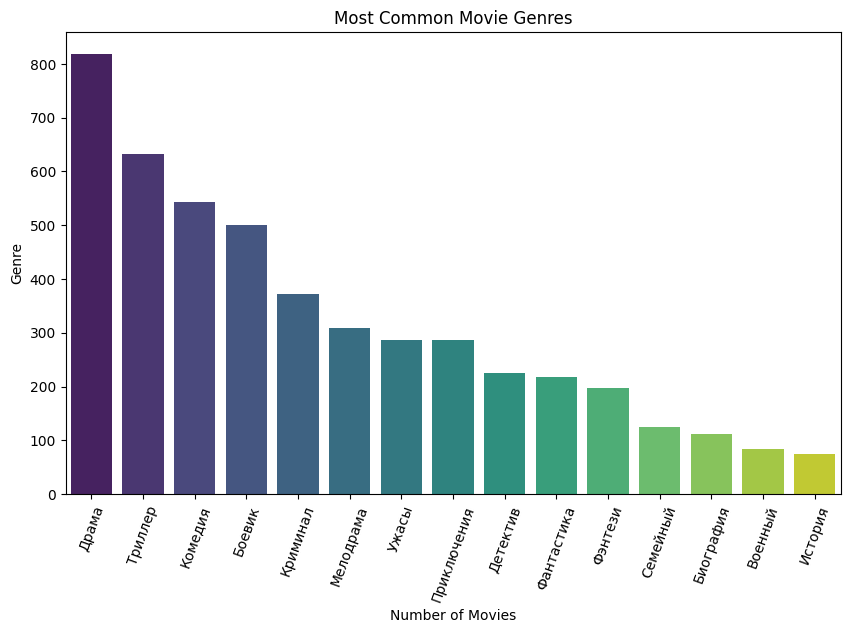

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


df = pd.read_csv('movies_data.csv')
df.dropna(inplace=True)
print("Basic Statistics:")
print(df.describe())

print("Missing Values:")
print(df.isnull().sum())

all_genres = [genre.strip() for sublist in df['genres'] for genre in sublist.split(',')]
genre_counts = Counter(all_genres)
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=genre_counts_df.head(15),
    x="Genre",
    y="Count",
    palette="viridis"
)
plt.title("Most Common Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.xticks(rotation=70)
plt.show()






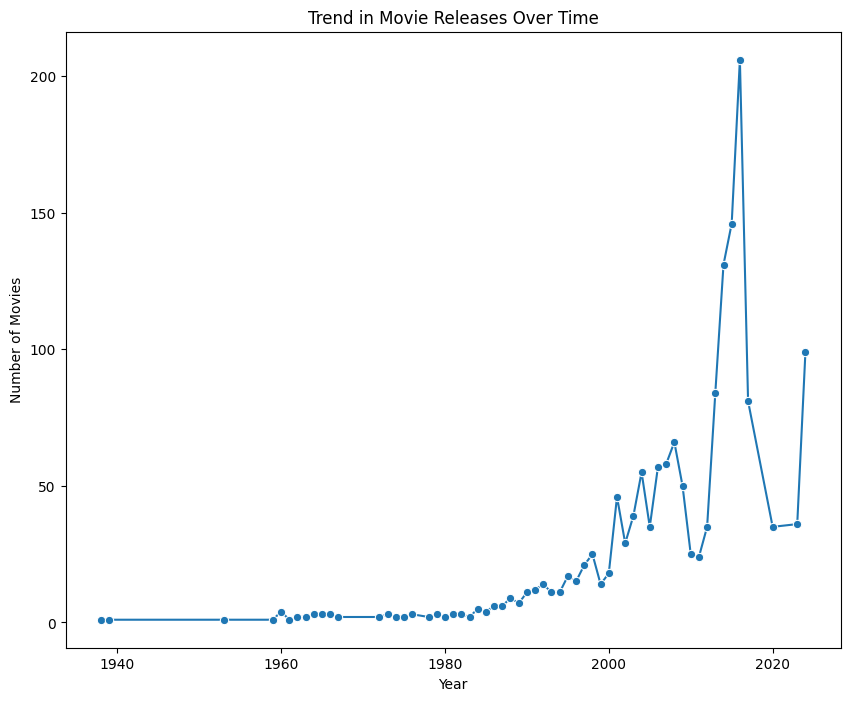

In [10]:

plt.figure(figsize=(10, 8))
release_trend = df['release_year'].value_counts().sort_index()
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o')
plt.title("Trend in Movie Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


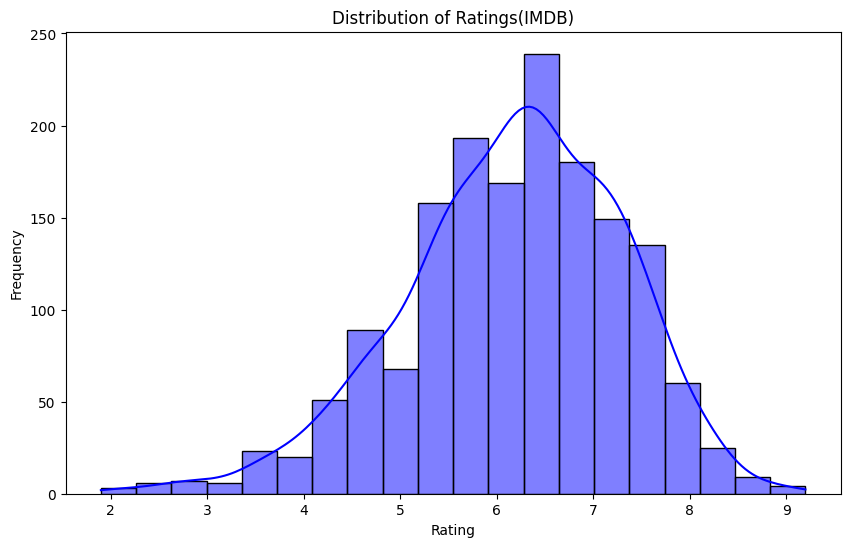

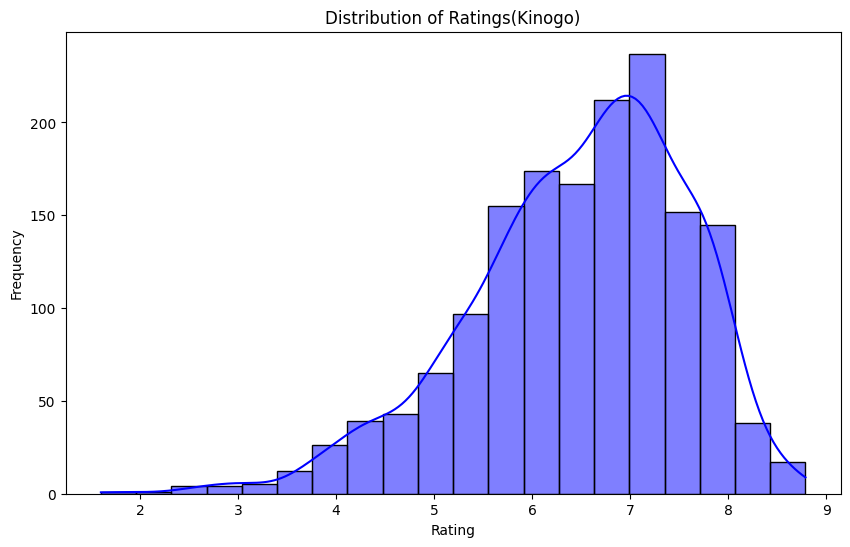

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Ratings(IMDB)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['kp_rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Ratings(Kinogo)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

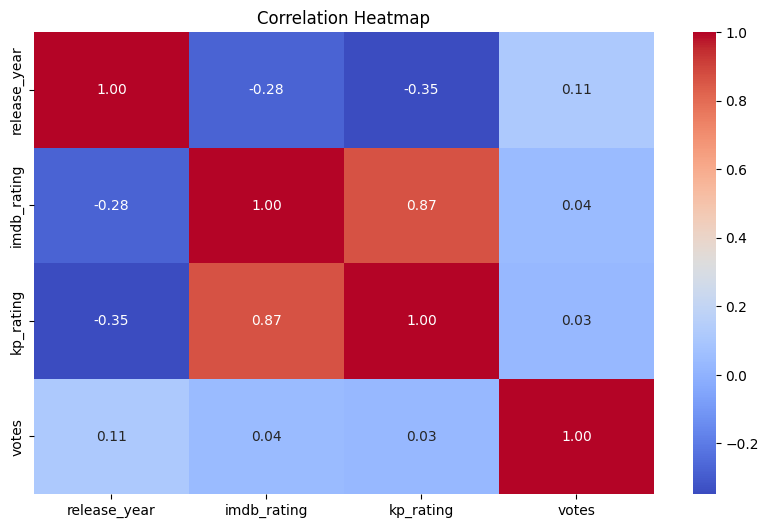

In [12]:

plt.figure(figsize=(10, 6))
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Milestone 4: Linear Regression Model for Rating Prediction

Requirements:

● Train a linear regression model to predict the IMDb rating based on features such as release
year, number of votes, and genres.

● Split the dataset into training and testing sets (e.g., 80-20 split).

● Evaluate the model using metrics like RMSE, MAE, or R² score.

● Visualize the predicted vs. actual ratings.

Model Evaluation Metrics:
Root Mean Squared Error (RMSE): 0.14025371156283842
Mean Absolute Error (MAE): 0.10841616336776617
R² Score: 0.1677354735225065


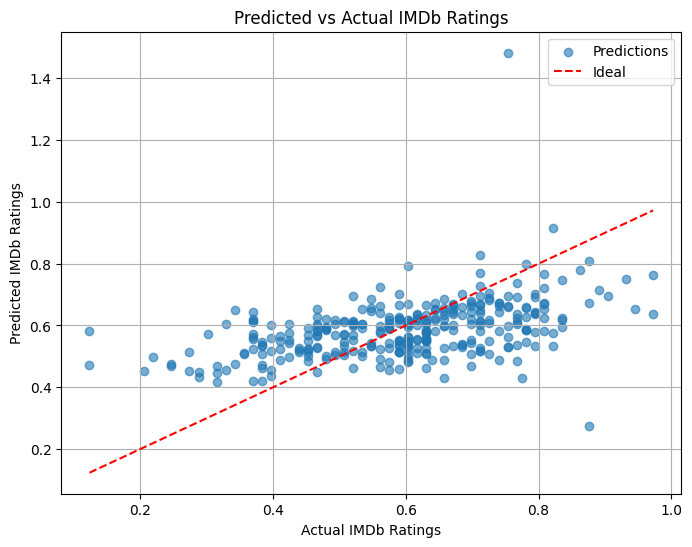

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
import matplotlib.pyplot as plt

movies_data = pd.read_csv('movies_data_cleaned.csv')
movies_data['genres'] = movies_data['genres'].apply(eval)
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(movies_data['genres']), columns=mlb.classes_)
movies_data_expanded = pd.concat([movies_data, genres_encoded], axis=1).drop(columns=['genres'])
feature_columns = ['release_year', 'votes', 'country'] + list(genres_encoded.columns)

X = movies_data_expanded[feature_columns]
y = movies_data_expanded['imdb_rating']

X.columns = X.columns.astype(str)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal")
plt.title("Predicted vs Actual IMDb Ratings")
plt.xlabel("Actual IMDb Ratings")
plt.ylabel("Predicted IMDb Ratings")
plt.legend()
plt.grid()
plt.show()


Milestone 5: Building a Simple Recommendation System

Requirements:

● Implement a collaborative filtering-based recommendation system:

○ Use user rating data to find similar users (based on movie preferences).

○ Recommend movies that similar users have liked.

● Alternatively, implement a content-based filtering system using genres and descriptions.

● Allow users to input a movie they liked and receive similar recommendations